# Implementation von annotation_example1.txt

In [1]:
import math
import numpy as np
import random as rd
import pandas as pd
from scipy import stats 

import matplotlib.pyplot as plt
import matplotlib as mat
import holoviews as hv

import vaex as vaex
import vaex.jupyter.model as vjm

import seaborn as sns

import time


## Die Daten werden hier eingelesen.
###### Mit Übergabe als <class 'vaex.dataframe.DataFrameArrays'> mit Ausgabe der dafür benötigten Zeit

Hier wurde die Datei über Vaex importiert und beim back_value gab es eine kleine Nachbereitung im Namen, da scheinbar mit dem Namen aus der letzten Spalte es zu Komplikationen kommt und das unabhängig davon dass wir hier Vaex verwenden, dies war nämlich auch beim Importieren mit Pandas auch so.

In [2]:
start_proc = time.process_time()

df = vaex.from_csv(
    '/Users/samel/Documents/Hochschule/aktuelles Semester/03. Projekt zur Datenanalyse/Datein/annotation_example1.txt',
    sep=";",
    header=0
    )

df.rename(df.get_column_names()[6], 'backvalue')

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc),'\n\nDie Länge des Datensatzes beträgt:', len(df))

df


Benötigte Systemzeit: 6.512s 

Die Länge des Datensatzes beträgt: 3985920


#,pos_id,barcode,run_id,test_date,sign,value,backvalue
0,'1D99900010425','1D9990001AA',1,'2011-08-02 10:08','n',102.48,99.97
1,'1D99900010426','1D9990001AA',1,'2011-08-02 10:08','n',89.8,106.2
2,'1D99900010427','1D9990001AA',1,'2011-08-02 10:08','n',91.11,104.31
3,'1D99900010428','1D9990001AA',1,'2011-08-02 10:08','n',86.9,107.12
4,'1D99900010429','1D9990001AA',1,'2011-08-02 10:08','n',88.18,100.59
...,...,...,...,...,...,...,...
"3,985,915",'1DUMY04150201','1DUMY0415AE',11,'2012-10-27 10:10','n',90.98,104.34
"3,985,916",'1DUMY04150202','1DUMY0415AE',11,'2012-10-27 10:10','n',103.84,110.09
"3,985,917",'1DUMY04150203','1DUMY0415AE',11,'2012-10-27 10:10','n',109.63,100.68
"3,985,918",'1DUMY04150204','1DUMY0415AE',11,'2012-10-27 10:10','n',100.13,101.13


## Hier sollen die Dateien in Kategorien aufgeteilt werden
##### Nebenbei werden die Dateien mit den Variablen in 'df_zahl_ohne_f' übergeben, die die Datei ohne die Werte der Kategorie 'f' besteht und verwendet werden soll.

In [3]:
f = df[df.sign == 'f'] # f => failure (ein Problem mit einem der Geräte)

n = df[df.sign == 'n'] # n => neutral (nur Lösungsmittel, keine Substanz)

p = df[df.sign == 'p'] # p => positiv (kontrolle mit -max- Effekt, bzw. verschiede Konzentrationen -> DWK)

z = df[df.sign == 'z'] # z => zero (negative kontrolle, oder zweite kontrolle, ditto)

s = df[df.sign == 's'] # s => substanz (getestetes kleines chem. Molekül)

In [4]:
print('Länge des gesamten Datensatzes aus annotation_example1.txt:', len(df), '\n', '\n')
print('Länge der Kategorie f:', len(f), '\n')
print('Länge der Kategorie n:', len(n), '\n')
print('Länge der Kategorie p:', len(p), '\n')
print('Länge der Kategorie z:', len(z), '\n')
print('Länge der Kategorie s:', len(s), '\n')

print("Wobei wir die Kategorie 'f' vernachläsigen werden, da es sich hierbei um Gerätefehler handelt:")
print( len(df), '-' ,len(df[df.sign == 'f']), ' =', len(s) + len(z) + len(p) + len(n))


Länge des gesamten Datensatzes aus annotation_example1.txt: 3985920 
 

Länge der Kategorie f: 638 

Länge der Kategorie n: 778292 

Länge der Kategorie p: 6144 

Länge der Kategorie z: 2368 

Länge der Kategorie s: 3198478 

Wobei wir die Kategorie 'f' vernachläsigen werden, da es sich hierbei um Gerätefehler handelt:
3985920 - 638  = 3985282


Hier werden Boplots geplottet.

In [6]:
datei = df.to_pandas_df(['pos_id', 'barcode', 'run_id', 'test_date', 'sign', 'value', 'backvalue'])
datei


,pos_id,barcode,run_id,test_date,sign,value,backvalue
0,1D99900010425,1D9990001AA,1,2011-08-02 10:08,n,102.48,99.97
1,1D99900010426,1D9990001AA,1,2011-08-02 10:08,n,89.80,106.20
2,1D99900010427,1D9990001AA,1,2011-08-02 10:08,n,91.11,104.31
3,1D99900010428,1D9990001AA,1,2011-08-02 10:08,n,86.90,107.12
4,1D99900010429,1D9990001AA,1,2011-08-02 10:08,n,88.18,100.59
...,...,...,...,...,...,...,...
3985915,1DUMY04150201,1DUMY0415AE,11,2012-10-27 10:10,n,90.98,104.34
3985916,1DUMY04150202,1DUMY0415AE,11,2012-10-27 10:10,n,103.84,110.09
3985917,1DUMY04150203,1DUMY0415AE,11,2012-10-27 10:10,n,109.63,100.68
3985918,1DUMY04150204,1DUMY0415AE,11,2012-10-27 10:10,n,100.13,101.13


In [7]:
f = datei[ (datei['sign'] == 'f')].index

datei.drop(f, inplace=True)


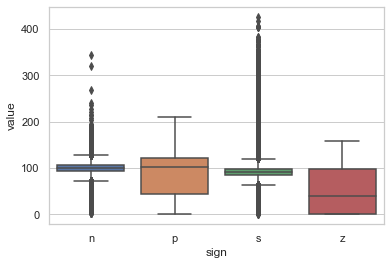

In [8]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x="sign", y="value", data=datei)

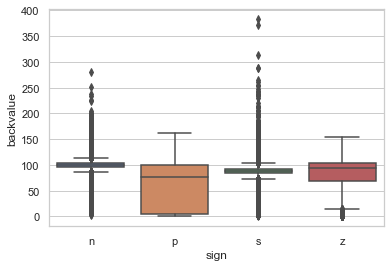

In [9]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x="sign", y="backvalue", data=datei)


## Inteervalle festlegen, um zukünftig Ausreißer entfernen zu können.
 
### Intervalsgrenzen bestimmen
Die Intervalle beziehen sich auf die jeweilige Kategorie (n, p, z, s).

In [10]:
print('Die Intervalle sind auf die jeweiligen signs bezogen und dem entsprechenden Feature, jedoch haben diese nicht den selben Intervall, was bei der Modelierung später angepasst werden muss:\n')

n_stdValue = n.std('value')
n_stdBackvalue = n.std('backvalue')
n_meanValue = n.mean('value')
n_meanBackvalue = n.mean('backvalue')


n_ValueGrenzen = (n_meanValue - (n_stdValue),
                  n_meanValue + (n_stdValue) )

n_BackvalueGrenzen = (n_meanBackvalue - (n_stdBackvalue),
                      n_meanBackvalue + (n_stdBackvalue) )

print('1std-n:', '\n', 'VALUE:', n_ValueGrenzen, 'BACK_VALUE:', n_BackvalueGrenzen, '\n')


n_3_ValueGrenzen = (n_meanValue - (3 * n_stdValue),
                    n_meanValue + (3 * n_stdValue) )

n_3_BackvalueGrenzen = (n_meanBackvalue - (3 * n_stdBackvalue),
                        n_meanBackvalue + (3 * n_stdBackvalue) )

print('3std-n:', '\n', 'VALUE:', n_3_ValueGrenzen, 'BACK_VALUE:', n_3_BackvalueGrenzen, '\n')


n_5_ValueGrenzen = (n_meanValue - (5 * n_stdValue),
                    n_meanValue + (5 * n_stdValue) )

n_5_BackvalueGrenzen = (n_meanBackvalue - (5 * n_stdBackvalue),
                        n_meanBackvalue + (5 * n_stdBackvalue) )

print('5std-n:', '\n', 'VALUE:', n_5_ValueGrenzen, 'BACK_VALUE:', n_5_BackvalueGrenzen, '\n', '\n', '\n')




p_stdValue = p.std('value')
p_stdBackvalue = p.std('backvalue')
p_meanValue = p.mean('value')
p_meanBackvalue = p.mean('backvalue')


p_ValueGrenzen = (p_meanValue - (p_stdValue),
                  p_meanValue + (p_stdValue) )

p_BackvalueGrenzen = (p_meanBackvalue - (p_stdBackvalue),
                      p_meanBackvalue + (p_stdBackvalue) )

print('1std-p:', '\n', 'VALUE:', p_ValueGrenzen, 'BACK_VALUE:', p_BackvalueGrenzen, '\n')


p_3_ValueGrenzen = (p_meanValue - (3 * p_stdValue),
                    p_meanValue + (3 * p_stdValue) )

p_3_BackvalueGrenzen = (p_meanBackvalue - (3 * p_stdBackvalue),
                        p_meanBackvalue + (3 * p_stdBackvalue) )

print('3std-p:', '\n', 'VALUE:', p_3_ValueGrenzen, 'BACK_VALUE:', p_3_BackvalueGrenzen, '\n')


p_5_ValueGrenzen = (p_meanValue - (5 * p_stdValue),
                    p_meanValue + (5 * p_stdValue) )

p_5_BackvalueGrenzen = (p_meanBackvalue - (5 * p_stdBackvalue),
                        p_meanBackvalue + (5 * p_stdBackvalue) )

print('5std-p:', '\n', 'VALUE:', p_5_ValueGrenzen, 'BACK_VALUE:', p_5_BackvalueGrenzen, '\n', '\n', '\n')




z_stdValue = z.std('value')
z_stdBackvalue = z.std('backvalue')
z_meanValue = z.mean('value')
z_meanBackvalue = z.mean('backvalue')


z_ValueGrenzen = (z_meanValue - (z_stdValue),
                  z_meanValue + (z_stdValue) )

z_BackvalueGrenzen = (z_meanBackvalue - (z_stdBackvalue),
                      z_meanBackvalue + (z_stdBackvalue) )

print('1std-z:', '\n', 'VALUE:', z_ValueGrenzen, 'BACK_VALUE:', z_BackvalueGrenzen, '\n')


z_3_ValueGrenzen = (z_meanValue - (3 * z_stdValue),
                    z_meanValue + (3 * z_stdValue) )

z_3_BackvalueGrenzen = (z_meanBackvalue - (3 * z_stdBackvalue),
                        z_meanBackvalue + (3 * z_stdBackvalue) )

print('3std-z:', '\n', 'VALUE:', z_3_ValueGrenzen, 'BACK_VALUE:', z_3_BackvalueGrenzen, '\n')


z_5_ValueGrenzen = (z_meanValue - (5 * z_stdValue),
                    z_meanValue + (5 * z_stdValue) )

z_5_BackvalueGrenzen = (z_meanBackvalue - (5 * z_stdBackvalue),
                        z_meanBackvalue + (5 * z_stdBackvalue) )

print('5std-z:', '\n', 'VALUE:', z_5_ValueGrenzen, 'BACK_VALUE:', z_5_BackvalueGrenzen, '\n', '\n', '\n')




s_stdValue = s.std('value')
s_stdBackvalue = s.std('backvalue')
s_meanValue = s.mean('value')
s_meanBackvalue = s.mean('backvalue')


s_ValueGrenzen = (s_meanValue - (s_stdValue),
                  s_meanValue + (s_stdValue) )

s_BackvalueGrenzen = (s_meanBackvalue - (s_stdBackvalue),
                      s_meanBackvalue + (s_stdBackvalue) )

print('1std-s:', '\n', 'VALUE:', s_ValueGrenzen, 'BACK_VALUE:', s_BackvalueGrenzen, '\n')


s_3_ValueGrenzen = (s_meanValue - (3 * s_stdValue),
                    s_meanValue + (3 * s_stdValue) )

s_3_BackvalueGrenzen = ( s_meanBackvalue - (3 * s_stdBackvalue),
                        s_meanBackvalue + (3 * s_stdBackvalue) )

print('3std-s:', '\n', 'VALUE:', s_3_ValueGrenzen, 'BACK_VALUE:', s_3_BackvalueGrenzen, '\n')


s_5_ValueGrenzen = (s_meanValue - (5 * s_stdValue),
                    s_meanValue + (5 * s_stdValue) )

s_5_BackvalueGrenzen = (s_meanBackvalue - (5 * s_stdBackvalue),
                        s_meanBackvalue + (5 * s_stdBackvalue) )

print('5std-s:', '\n', 'VALUE:', s_5_ValueGrenzen, 'BACK_VALUE:', s_5_BackvalueGrenzen, '\n')


Die Intervalle sind auf die jeweiligen signs bezogen und dem entsprechenden Feature, jedoch haben diese nicht den selben Intervall, was bei der Modelierung später angepasst werden muss:

1std-n: 
 VALUE: (88.57369258163914, 112.38557658725944) BACK_VALUE: (93.84421086804824, 106.56420116753705) 

3std-n: 
 VALUE: (64.76180857601881, 136.19746059287976) BACK_VALUE: (81.12422056855941, 119.28419146702588) 

5std-n: 
 VALUE: (40.9499245703985, 160.00934459850006) BACK_VALUE: (68.40423026907058, 132.0041817665147) 
 
 

1std-p: 
 VALUE: (39.112395684150236, 134.92349624293314) BACK_VALUE: (15.197270024591653, 104.39062711082505) 

3std-p: 
 VALUE: (-56.69870487463267, 230.73459680171607) BACK_VALUE: (-73.99608706164176, 193.58398419705847) 

5std-p: 
 VALUE: (-152.50980543341558, 326.545697360499) BACK_VALUE: (-163.18944414787515, 282.7773412832919) 
 
 

1std-z: 
 VALUE: (2.092893691447081, 97.90605056530967) BACK_VALUE: (44.9289040381873, 114.9534439347856) 

3std-z: 
 VALUE: (-93.720263

Entsprechend der Grenzen Bereinigen

In [11]:
print('+-(std)')
n_cleaned = n[(n['value'] <= n_ValueGrenzen[1] )
              & (n['value'] >= n_ValueGrenzen[0] )
              & (n['backvalue'] <= n_BackvalueGrenzen[1] )
              & (n['backvalue'] >= n_BackvalueGrenzen[0] )
             ]

print('n:', len(n), '=> n_cleaned:', len(n_cleaned), '\n')


p_cleaned = p[(p['value'] <= p_ValueGrenzen[1] )
              & (p['value'] >= p_ValueGrenzen[0] )
              & (p['backvalue'] <= p_BackvalueGrenzen[1] )
              & (p['backvalue'] >= p_BackvalueGrenzen[0] )
             ]

print('p:', len(p), '=> p_cleaned:', len(p_cleaned), '\n')


z_cleaned = z[(z['value'] <= z_ValueGrenzen[1] )
              & (z['value'] >= z_ValueGrenzen[0] )
              & (z['backvalue'] <= z_BackvalueGrenzen[1] )
              & (z['backvalue'] >= z_BackvalueGrenzen[0] )
             ]

print('z:', len(z), '=> z_cleaned:', len(z_cleaned), '\n')


s_cleaned = s[(s['value'] <= s_ValueGrenzen[1] )
              & (s['value'] >= s_ValueGrenzen[0] )
              & (s['backvalue'] <= s_BackvalueGrenzen[1] )
              & (s['backvalue'] >= s_BackvalueGrenzen[0] )
             ]

print('s:', len(s), '=> s_cleaned:', len(s_cleaned), '\n\n')

df_cleaned = n_cleaned.concat(p_cleaned)
df_cleaned = df_cleaned.concat(z_cleaned)
df_cleaned = df_cleaned.concat(s_cleaned)

print('result. Gesam.:',
      len(df), 
      '=> result. clean Gesam.:', 
      len(df_cleaned),
      '\n\n\n'
     )



print('+-(3std)')
n_3_cleaned = n[(n['value'] <= n_3_ValueGrenzen[1] )
              & (n['value'] >= n_3_ValueGrenzen[0] )
              & (n['backvalue'] <= n_3_BackvalueGrenzen[1] )
              & (n['backvalue'] >= n_3_BackvalueGrenzen[0] )
             ]

print('n:', len(n), '=> n_cleaned:', len(n_3_cleaned), '\n')


p_3_cleaned = p[(p['value'] <= p_3_ValueGrenzen[1] )
              & (p['value'] >= p_3_ValueGrenzen[0] )
              & (p['backvalue'] <= p_3_BackvalueGrenzen[1] )
              & (p['backvalue'] >= p_3_BackvalueGrenzen[0] )
             ]

print('p:', len(p), '=> p_cleaned:', len(p_3_cleaned), '\n')


z_3_cleaned = z[(z['value'] <= z_3_ValueGrenzen[1] )
              & (z['value'] >= z_3_ValueGrenzen[0] )
              & (z['backvalue'] <= z_3_BackvalueGrenzen[1] )
              & (z['backvalue'] >= z_3_BackvalueGrenzen[0] )
             ]

print('z:', len(z), '=> z_cleaned:', len(z_3_cleaned), '\n')


s_3_cleaned = s[(s['value'] <= s_3_ValueGrenzen[1] )
              & (s['value'] >= s_3_ValueGrenzen[0] )
              & (s['backvalue'] <= s_3_BackvalueGrenzen[1] )
              & (s['backvalue'] >= s_3_BackvalueGrenzen[0] )
             ]

print('s:', len(s), '=> s_cleaned:', len(s_3_cleaned), '\n\n')

df_3_cleaned = n_3_cleaned.concat(p_3_cleaned)
df_3_cleaned = df_3_cleaned.concat(z_3_cleaned)
df_3_cleaned = df_3_cleaned.concat(s_3_cleaned)

print('result. Gesam.:',
      len(df), 
      '=> result. clean Gesam.:', 
      len(df_3_cleaned),
      '\n\n\n'
     )


print('+-(5std)')
n_5_cleaned = n[(n['value'] <= n_5_ValueGrenzen[1] )
              & (n['value'] >= n_5_ValueGrenzen[0] )
              & (n['backvalue'] <= n_5_BackvalueGrenzen[1] )
              & (n['backvalue'] >= n_5_BackvalueGrenzen[0] )
             ]

print('n:', len(n), '=> n_cleaned:', len(n_5_cleaned), '\n')


p_5_cleaned = p[(p['value'] <= p_5_ValueGrenzen[1] )
              & (p['value'] >= p_5_ValueGrenzen[0] )
              & (p['backvalue'] <= p_5_BackvalueGrenzen[1] )
              & (p['backvalue'] >= p_5_BackvalueGrenzen[0] )
             ]

print('p:', len(p), '=> p_cleaned:', len(p_5_cleaned), '\n')


z_5_cleaned = z[(z['value'] <= z_5_ValueGrenzen[1] )
              & (z['value'] >= z_5_ValueGrenzen[0] )
              & (z['backvalue'] <= z_5_BackvalueGrenzen[1] )
              & (z['backvalue'] >= z_5_BackvalueGrenzen[0] )
             ]

print('z:', len(z), '=> z_cleaned:', len(z_5_cleaned), '\n')


s_5_cleaned = s[(s['value'] <= s_5_ValueGrenzen[1] )
              & (s['value'] >= s_5_ValueGrenzen[0] )
              & (s['backvalue'] <= s_5_BackvalueGrenzen[1] )
              & (s['backvalue'] >= s_5_BackvalueGrenzen[0] )
             ]

print('s:', len(s), '=> s_cleaned:', len(s_5_cleaned), '\n\n')

df_5_cleaned = n_5_cleaned.concat(p_5_cleaned)
df_5_cleaned = df_5_cleaned.concat(z_5_cleaned)
df_5_cleaned = df_5_cleaned.concat(s_5_cleaned)

print('result. Gesam.:',
      len(df), 
      '=> result. clean Gesam.:', 
      len(df_5_cleaned),
      '\n'
     )


+-(std)
n: 778292 => n_cleaned: 418510 

p: 6144 => p_cleaned: 2241 

z: 2368 => z_cleaned: 934 

s: 3198478 => s_cleaned: 1967252 


result. Gesam.: 3985920 => result. clean Gesam.: 2388937 



+-(3std)
n: 778292 => n_cleaned: 766475 

p: 6144 => p_cleaned: 6144 

z: 2368 => z_cleaned: 2368 

s: 3198478 => s_cleaned: 3124902 


result. Gesam.: 3985920 => result. clean Gesam.: 3899889 



+-(5std)
n: 778292 => n_cleaned: 776902 

p: 6144 => p_cleaned: 6144 

z: 2368 => z_cleaned: 2368 

s: 3198478 => s_cleaned: 3177787 


result. Gesam.: 3985920 => result. clean Gesam.: 3963201 



Erneute Bereinigung um eine gemiensame Grenzen zu finden:

In [12]:
df_copy = df_cleaned.copy()
df_cleaned_scaled = df_copy[(df_copy['value'] <= 500 )
                            & (df_copy['value'] >= 0 )
                            & (df_copy['backvalue'] <= 200 )
                            & (df_copy['backvalue'] >= 0 )
                           ]

print('df_cleaned:', len(df_cleaned), '=> df_cleaned_scaled:', len(df_cleaned_scaled), '\n')


df_copy = df_3_cleaned.copy()
df_3_cleaned_scaled = df_copy[(df_copy['value'] <= 500 )
                            & (df_copy['value'] >= 0 )
                            & (df_copy['backvalue'] <= 200 )
                            & (df_copy['backvalue'] >= 0 )
                           ]

print('df_cleaned:', len(df_3_cleaned), '=> df_cleaned_scaled:', len(df_3_cleaned_scaled), '\n')


df_copy = df_5_cleaned.copy()
df_5_cleaned_scaled = df_copy[(df_copy['value'] <= 500 )
                            & (df_copy['value'] >= 0 )
                            & (df_copy['backvalue'] <= 200 )
                            & (df_copy['backvalue'] >= 0 )
                           ]

print('df_cleaned:', len(df_5_cleaned), '=> df_cleaned_scaled:', len(df_5_cleaned_scaled), '\n')


df_cleaned: 2388937 => df_cleaned_scaled: 2388937 

df_cleaned: 3899889 => df_cleaned_scaled: 3899889 

df_cleaned: 3963201 => df_cleaned_scaled: 3963201 



In [13]:
n_cleaned_scaled = df_cleaned_scaled[df_cleaned_scaled.sign == 'n']
print('n:', len(n_cleaned_scaled))

p_cleaned_scaled = df_cleaned_scaled[df_cleaned_scaled.sign == 'p']
print('p:', len(p_cleaned_scaled))

z_cleaned_scaled = df_cleaned_scaled[df_cleaned_scaled.sign == 'z']
print('z:', len(z_cleaned_scaled))

s_cleaned_scaled = df_cleaned_scaled[df_cleaned_scaled.sign == 's']
print('s:', len(s_cleaned_scaled))


n: 418510
p: 2241
z: 934
s: 1967252


In [14]:
n_3_cleaned_scaled = df_3_cleaned_scaled[df_3_cleaned_scaled.sign == 'n']
print('n:', len(n_3_cleaned_scaled))

p_3_cleaned_scaled = df_3_cleaned_scaled[df_3_cleaned_scaled.sign == 'p']
print('p:', len(p_3_cleaned_scaled))

z_3_cleaned_scaled = df_3_cleaned_scaled[df_3_cleaned_scaled.sign == 'z']
print('z:', len(z_3_cleaned_scaled))

s_3_cleaned_scaled = df_3_cleaned_scaled[df_3_cleaned_scaled.sign == 's']
print('s:', len(s_3_cleaned_scaled))


n: 766475
p: 6144
z: 2368
s: 3124902


In [15]:
n_5_cleaned_scaled = df_5_cleaned_scaled[df_5_cleaned_scaled.sign == 'n']
print('n:', len(n_5_cleaned_scaled))

p_5_cleaned_scaled = df_5_cleaned_scaled[df_5_cleaned_scaled.sign == 'p']
print('p:', len(p_5_cleaned_scaled))

z_5_cleaned_scaled = df_5_cleaned_scaled[df_5_cleaned_scaled.sign == 'z']
print('z:', len(z_5_cleaned_scaled))

s_5_cleaned_scaled = df_5_cleaned_scaled[df_5_cleaned_scaled.sign == 's']
print('s:', len(s_5_cleaned_scaled))


n: 776902
p: 6144
z: 2368
s: 3177787


## Plots

In [5]:
print('Die Intervalle sind auf die jeweiligen signs bezogen und dem entsprechenden Feature, jedoch haben diese nicht den selben Intervall, was bei der Modelierung später angepasst werden muss:\n')

n_our_ValueGrenzen = ( 0, 500 )

n_our_BackvalueGrenzen = ( 0, 200 )

print('n_Intervall:', '\n', 'VALUE:', n_our_ValueGrenzen, 'BACK_VALUE:', n_our_BackvalueGrenzen, '\n')


p_our_ValueGrenzen = ( 0, 500 )

p_our_BackvalueGrenzen = ( 0, 200 )

print('p_Intervall:', '\n', 'VALUE:', p_our_ValueGrenzen, 'BACK_VALUE:', p_our_BackvalueGrenzen, '\n')


z_our_ValueGrenzen = ( 0, 500 )

z_our_BackvalueGrenzen = ( 0, 200 )

print('z_Intervall:', '\n', 'VALUE:', z_our_ValueGrenzen, 'BACK_VALUE:', z_our_BackvalueGrenzen, '\n')


s_our_ValueGrenzen = ( 0, 500 )

s_our_BackvalueGrenzen = ( 0, 200 )

print('s_Intervall:', '\n', 'VALUE:', s_our_ValueGrenzen, 'BACK_VALUE:', s_our_BackvalueGrenzen, '\n')


our_n = n[(n['value'] < n_our_ValueGrenzen[1] )
          & (n['value'] >= n_our_ValueGrenzen[0] )
          & (n['backvalue'] < n_our_BackvalueGrenzen[1] )
          & (n['backvalue'] >= n_our_BackvalueGrenzen[0] )
         ]

print('n:', len(n), '=> n_cleaned:', len(our_n), '\n')


our_p = p[(p['value'] < p_our_ValueGrenzen[1] )
          & (p['value'] >= p_our_ValueGrenzen[0] )
          & (p['backvalue'] < p_our_BackvalueGrenzen[1] )
          & (p['backvalue'] >= p_our_BackvalueGrenzen[0] )
         ]

print('p:', len(p), '=> p_cleaned:', len(our_p), '\n')


our_z = z[(z['value'] < z_our_ValueGrenzen[1] )
          & (z['value'] >= z_our_ValueGrenzen[0] )
          & (z['backvalue'] < z_our_BackvalueGrenzen[1] )
          & (z['backvalue'] >= z_our_BackvalueGrenzen[0] )
         ]

print('z:', len(z), '=> z_cleaned:', len(our_z), '\n')


our_s = s[(s['value'] < s_our_ValueGrenzen[1] )
          & (s['value'] >= s_our_ValueGrenzen[0] )
          & (s['backvalue'] < s_our_BackvalueGrenzen[1] )
          & (s['backvalue'] >= s_our_BackvalueGrenzen[0] )
         ]

print('s:', len(s), '=> s_cleaned:', len(our_s), '\n\n')

our_df = our_n.concat(our_p)
#df_cleaned = df_cleaned.concat(z_cleaned)
our_df = our_df.concat(our_s)

print('result. Gesam.:',
      len(df), 
      '=> result. clean Gesam.:', 
      len(our_df),
      '\n\n\n'
     )

Die Intervalle sind auf die jeweiligen signs bezogen und dem entsprechenden Feature, jedoch haben diese nicht den selben Intervall, was bei der Modelierung später angepasst werden muss:

n_Intervall: 
 VALUE: (0, 500) BACK_VALUE: (0, 200) 

p_Intervall: 
 VALUE: (0, 500) BACK_VALUE: (0, 200) 

z_Intervall: 
 VALUE: (0, 500) BACK_VALUE: (0, 200) 

s_Intervall: 
 VALUE: (0, 500) BACK_VALUE: (0, 200) 

n: 778292 => n_cleaned: 778284 

p: 6144 => p_cleaned: 6144 

z: 2368 => z_cleaned: 2368 

s: 3198478 => s_cleaned: 3198453 


result. Gesam.: 3985920 => result. clean Gesam.: 3982881 





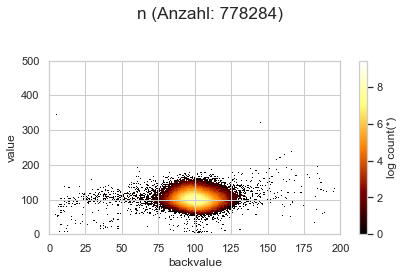

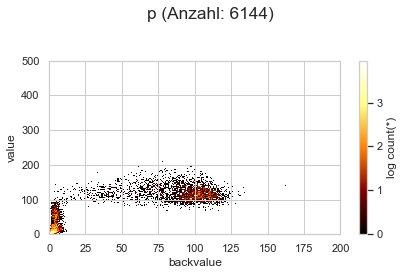

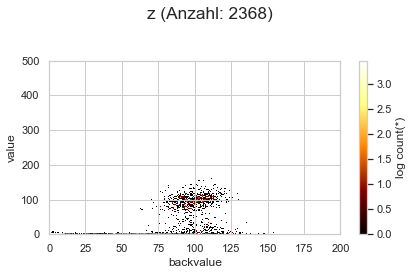

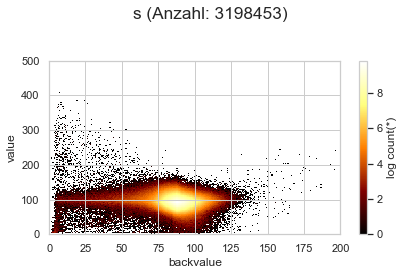

Benötigte Systemzeit: 1.470s


In [9]:
start_proc = time.process_time()
sns.set_theme(style="whitegrid")

# n_plot
n.plot(n.backvalue,
       n.value,
       limits=[[0, 200],
               [0, 500]],
       f='log',
       title='n (Anzahl: '+ str( len(our_n) ) + ')'
      )
#plt.title('n (Anzahl: '+ str( len(our_n) ) + ')')
plt.show()

# p_plot
p.plot(p.backvalue,
       p.value,
       limits=[[0, 200],
               [0, 500]],
       f='log',
       title='p (Anzahl: '+ str( len(our_p) ) + ')'
      )
#plt.title('p (Anzahl: '+ str( len(our_p) ) + ')')
plt.show()

# z_plot
z.plot(z.backvalue,
       z.value,
       limits=[[0, 200],
               [0, 500]],
       f='log',
       title='z (Anzahl: '+ str( len(our_z) ) + ')'
      )
#plt.title('z (Anzahl: '+ str( len(our_z) ) + ')')
plt.show()

# s_plot
s.plot(s.backvalue,
       s.value,
       limits=[[0, 200],
               [0, 500]],
       f='log',
       title='s (Anzahl: '+ str( len(our_s) ) + ')'
      )
#plt.title('s (Anzahl: '+ str( len(our_s) ) + ')')


plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))

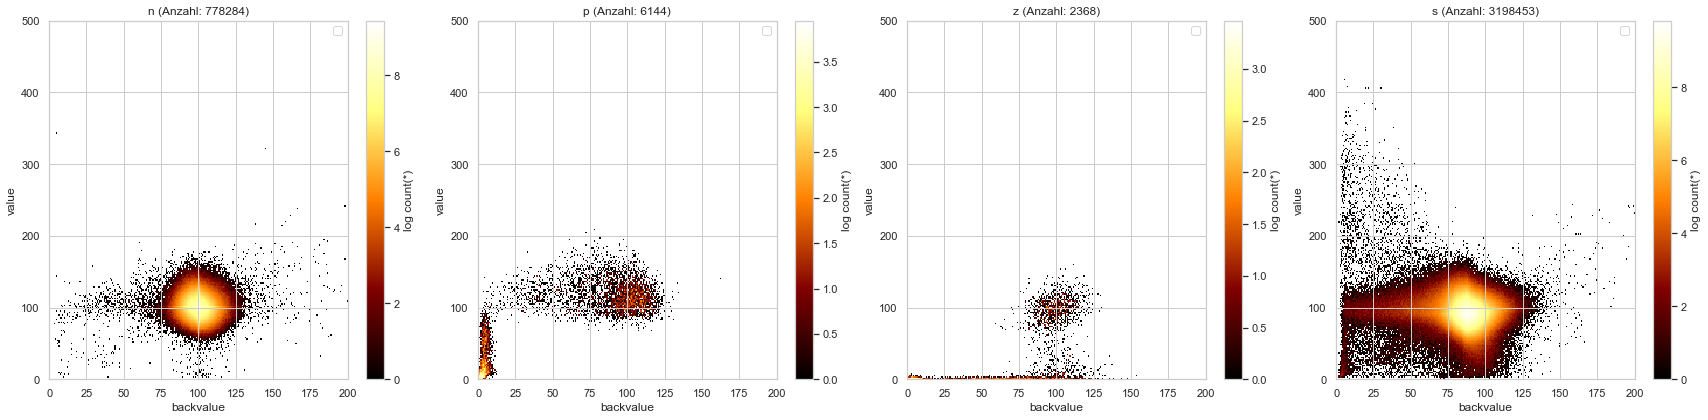

Benötigte Systemzeit: 1.435s


In [22]:
start_proc = time.process_time()
sns.set_theme(style="whitegrid")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))
plt.sca(ax1)
# code für 1te heatmap
n.plot(n.backvalue,
       n.value,
       limits=[[0, 200],
               [0, 500]],
       f='log'
      )
plt.title('n (Anzahl: '+ str( len(our_n) ) + ')')
plt.legend('(Anzahl: '+ str( len(n) ) + ')')


plt.sca(ax2)
# code für 2te heatmap
p.plot(p.backvalue,
       p.value,
       limits=[[0, 200],
               [0, 500]],
       f='log'
      )
plt.title('p (Anzahl: '+ str( len(our_p) ) + ')')
plt.legend('(Anzahl: '+ str( len(p) ) + ')')


plt.sca(ax3)
# code für 3te heatmap
z.plot(z.backvalue,
       z.value,
       limits=[[0, 200],
               [0, 500]],
       f='log'
      )
plt.title('z (Anzahl: '+ str( len(our_z) ) + ')')
plt.legend('(Anzahl: '+ str( len(z) ) + ')')


plt.sca(ax4)
# code für 4te heatmap
s.plot(s.backvalue,
       s.value,
       limits=[[0, 200],
               [0, 500]],
       f='log'
      )
plt.title('s (Anzahl: '+ str( len(our_s) ) + ')')
plt.legend('(Anzahl: '+ str( len(s) ) + ')')


plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))

+-1*std


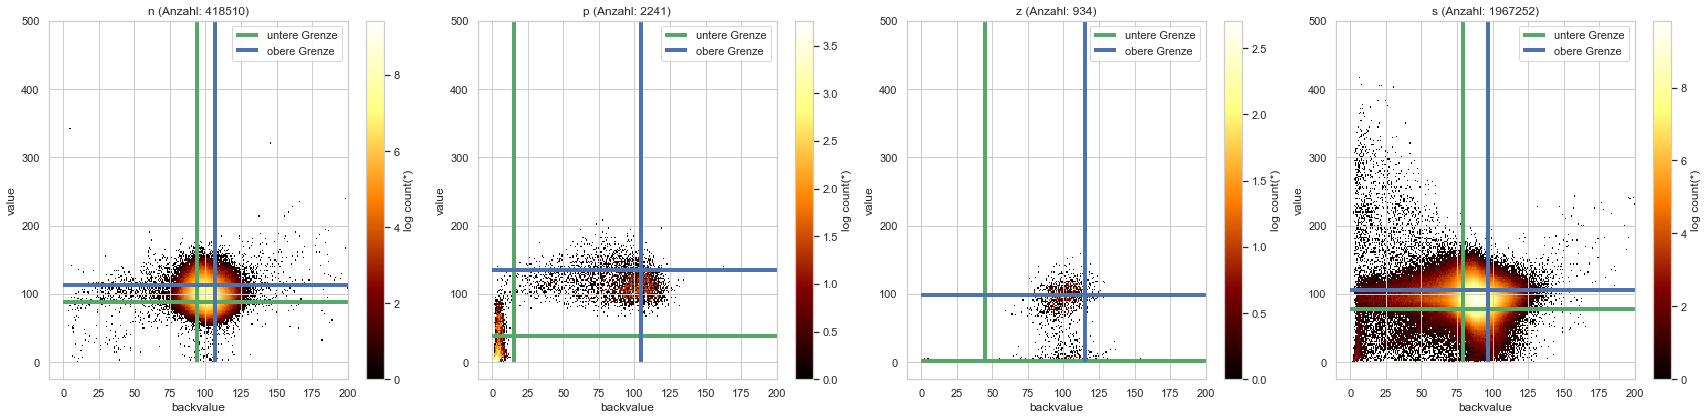

+-3*std


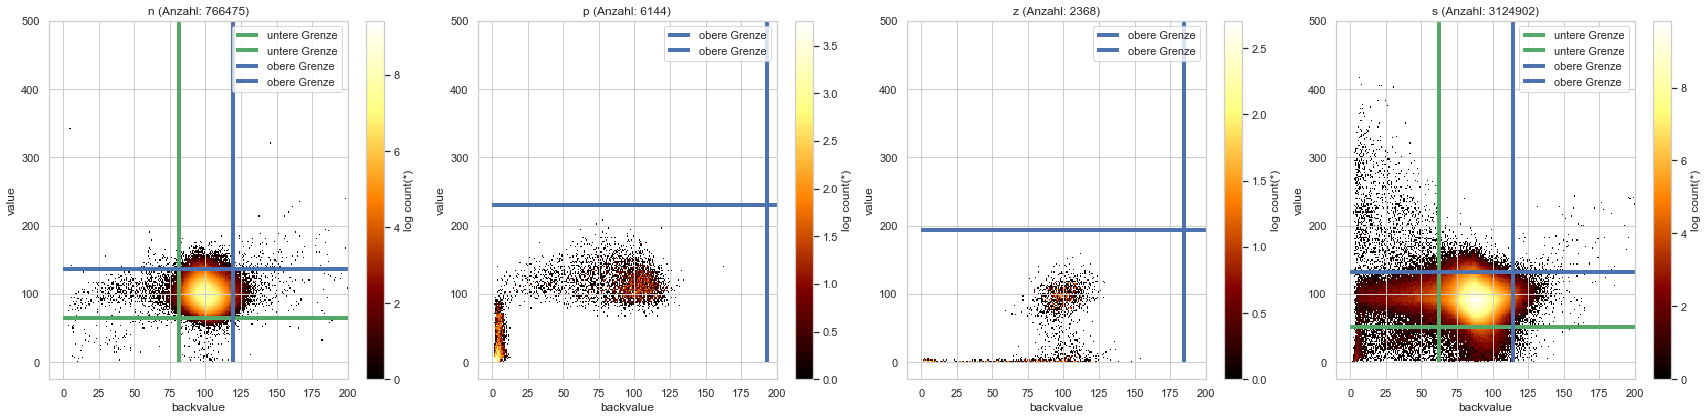

+-5*std


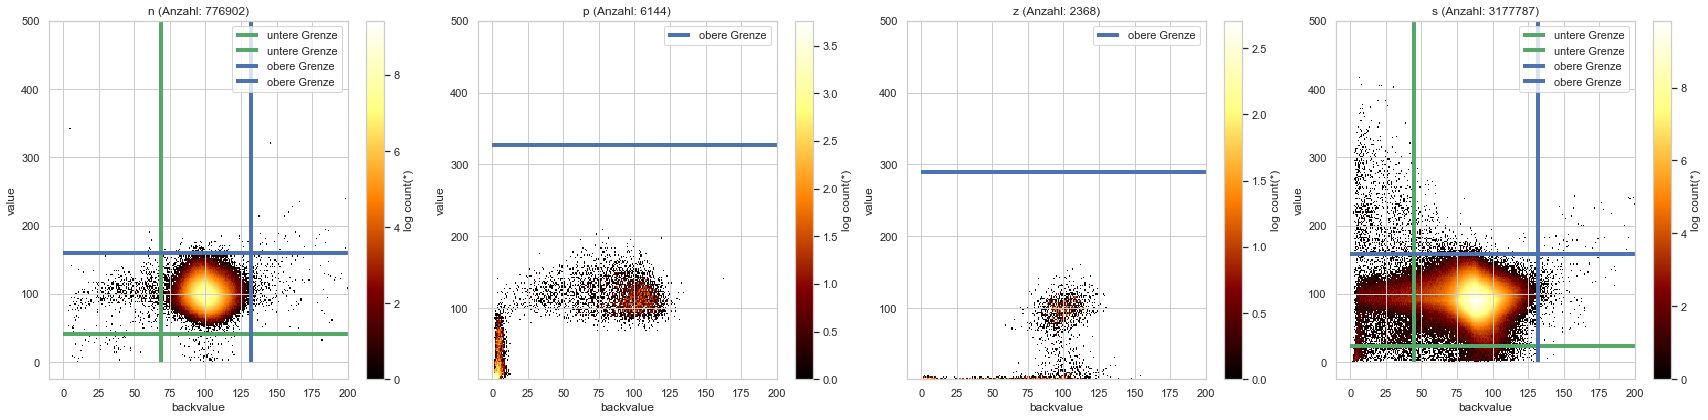

Benötigte Systemzeit: 4.472s


In [59]:
start_proc = time.process_time()
sns.set_theme(style="whitegrid")

print('+-1*std')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))
plt.sca(ax1)
# code für 1te heatmap
n.plot(n_cleaned_scaled.backvalue,
       n_cleaned_scaled.value,
       limits=[[1, 200],
               [1, 500]],
       f='log'
      )
plt.title('n (Anzahl: '+ str( len(n_cleaned_scaled) ) + ')')

plt.vlines(n_BackvalueGrenzen[0], 0, 500, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
plt.hlines(n_ValueGrenzen[0], 0, 200, linestyles ="solid", colors ="g", linewidth=4)

plt.vlines(n_BackvalueGrenzen[1], 0, 500, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.hlines(n_ValueGrenzen[1], 0, 200, linestyles ="solid", colors ="b", linewidth=4)
plt.legend()


plt.sca(ax2)
# code für 2te heatmap
p.plot(p.backvalue,
       p.value,
       limits=[[1, 200],
               [1, 500]],
       f='log'
      )
plt.title('p (Anzahl: '+ str( len(p_cleaned_scaled) ) + ')')

plt.vlines(p_BackvalueGrenzen[0], 0, 500, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
plt.hlines(p_ValueGrenzen[0], 0, 200, linestyles ="solid", colors ="g", linewidth=4)

plt.vlines(p_BackvalueGrenzen[1], 0, 500, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.hlines(p_ValueGrenzen[1], 0, 200, linestyles ="solid", colors ="b", linewidth=4)
plt.legend()


plt.sca(ax3)
# code für 3te heatmap
z.plot(z.backvalue,
       z.value,
       limits=[[1, 200],
               [1, 500]],
       f='log'
      )
plt.title('z (Anzahl: '+ str( len(z_cleaned_scaled) ) + ')')

plt.vlines(z_BackvalueGrenzen[0], 0, 500, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
plt.hlines(z_ValueGrenzen[0], 0, 200, linestyles ="solid", colors ="g", linewidth=4)

plt.vlines(z_BackvalueGrenzen[1], 0, 500, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.hlines(z_ValueGrenzen[1], 0, 200, linestyles ="solid", colors ="b", linewidth=4)
plt.legend()


plt.sca(ax4)
# code für 4te heatmap
s.plot(s.backvalue,
       s.value,
       limits=[[1, 200],
               [1, 500]],
       f='log'
      )
plt.title('s (Anzahl: '+ str( len(s_cleaned_scaled) ) + ')')

plt.vlines(s_BackvalueGrenzen[0], 0, 500, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
plt.hlines(s_ValueGrenzen[0], 0, 200, linestyles ="solid", colors ="g", linewidth=4)

plt.vlines(s_BackvalueGrenzen[1], 0, 500, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.hlines(s_ValueGrenzen[1], 0, 200, linestyles ="solid", colors ="b", linewidth=4)
plt.legend()


plt.show()




sns.set_theme(style="whitegrid")

print('+-3*std')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))
plt.sca(ax1)
# code für 1te heatmap
n.plot(n_cleaned_scaled.backvalue,
       n_cleaned_scaled.value,
       limits=[[1, 200],
               [1, 500]],
       f='log'
      )
plt.title('n (Anzahl: '+ str( len(n_3_cleaned_scaled) ) + ')')

plt.vlines(n_3_BackvalueGrenzen[0], 0, 500, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
plt.hlines(n_3_ValueGrenzen[0], 0, 200, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")

plt.vlines(n_3_BackvalueGrenzen[1], 0, 500, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.hlines(n_3_ValueGrenzen[1], 0, 200, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.legend()


plt.sca(ax2)
# code für 2te heatmap
p.plot(p.backvalue,
       p.value,
       limits=[[1, 200],
               [1, 500]],
       f='log'
      )
plt.title('p (Anzahl: '+ str( len(p_3_cleaned_scaled) ) + ')')

#plt.vlines(p_3_BackvalueGrenzen[0], 0, 500, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
#plt.hlines(p_3_ValueGrenzen[0], 0, 200, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")

plt.vlines(p_3_BackvalueGrenzen[1], 0, 500, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.hlines(p_3_ValueGrenzen[1], 0, 200, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.legend()


plt.sca(ax3)
# code für 3te heatmap
z.plot(z.backvalue,
       z.value,
       limits=[[1, 200],
               [1, 500]],
       f='log'
      )
plt.title('z (Anzahl: '+ str( len(z_3_cleaned_scaled) ) + ')')

#plt.vlines(z_3_BackvalueGrenzen[0], 0, 500, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
#plt.hlines(z_3_ValueGrenzen[0], 0, 200, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")

plt.vlines(z_3_BackvalueGrenzen[1], 0, 500, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.hlines(z_3_ValueGrenzen[1], 0, 200, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.legend()


plt.sca(ax4)
# code für 4te heatmap
s.plot(s.backvalue,
       s.value,
       limits=[[1, 200],
               [1, 500]],
       f='log'
      )
plt.title('s (Anzahl: '+ str( len(s_3_cleaned_scaled) ) + ')')

plt.vlines(s_3_BackvalueGrenzen[0], 0, 500, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
plt.hlines(s_3_ValueGrenzen[0], 0, 200, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")

plt.vlines(s_3_BackvalueGrenzen[1], 0, 500, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.hlines(s_3_ValueGrenzen[1], 0, 200, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.legend()


plt.show()



sns.set_theme(style="whitegrid")

print('+-5*std')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))
plt.sca(ax1)
# code für 1te heatmap
n.plot(n_cleaned_scaled.backvalue,
       n_cleaned_scaled.value,
       limits=[[1, 200],
               [1, 500]],
       f='log'
      )
plt.title('n (Anzahl: '+ str( len(n_5_cleaned_scaled) ) + ')')

plt.vlines(n_5_BackvalueGrenzen[0], 0, 500, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
plt.hlines(n_5_ValueGrenzen[0], 0, 200, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")

plt.vlines(n_5_BackvalueGrenzen[1], 0, 500, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.hlines(n_5_ValueGrenzen[1], 0, 200, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.legend()


plt.sca(ax2)
# code für 2te heatmap
p.plot(p.backvalue,
       p.value,
       limits=[[1, 200],
               [1, 500]],
       f='log'
      )
plt.title('p (Anzahl: '+ str( len(p_5_cleaned_scaled) ) + ')')

#plt.vlines(p_5_BackvalueGrenzen[0], 0, 500, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
#plt.hlines(p_5_ValueGrenzen[0], 0, 200, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")

#plt.vlines(p_5_BackvalueGrenzen[1], 0, 500, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.hlines(p_5_ValueGrenzen[1], 0, 200, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.legend()


plt.sca(ax3)
# code für 3te heatmap
z.plot(z.backvalue,
       z.value,
       limits=[[1, 200],
               [1, 500]],
       f='log'
      )
plt.title('z (Anzahl: '+ str( len(z_5_cleaned_scaled) ) + ')')

#plt.vlines(z_5_BackvalueGrenzen[0], 0, 500, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
#plt.hlines(z_5_ValueGrenzen[0], 0, 200, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")

#plt.vlines(z_5_BackvalueGrenzen[1], 0, 500, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.hlines(z_5_ValueGrenzen[1], 0, 200, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.legend()


plt.sca(ax4)
# code für 4te heatmap
s.plot(s.backvalue,
       s.value,
       limits=[[1, 200],
               [1, 500]],
       f='log'
      )
plt.title('s (Anzahl: '+ str( len(s_5_cleaned_scaled) ) + ')')

plt.vlines(s_5_BackvalueGrenzen[0], 0, 500, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")
plt.hlines(s_5_ValueGrenzen[0], 0, 200, linestyles ="solid", colors ="g", linewidth=4, label="untere Grenze")

plt.vlines(s_5_BackvalueGrenzen[1], 0, 500, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.hlines(s_5_ValueGrenzen[1], 0, 200, linestyles ="solid", colors ="b", linewidth=4, label="obere Grenze")
plt.legend()


plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))


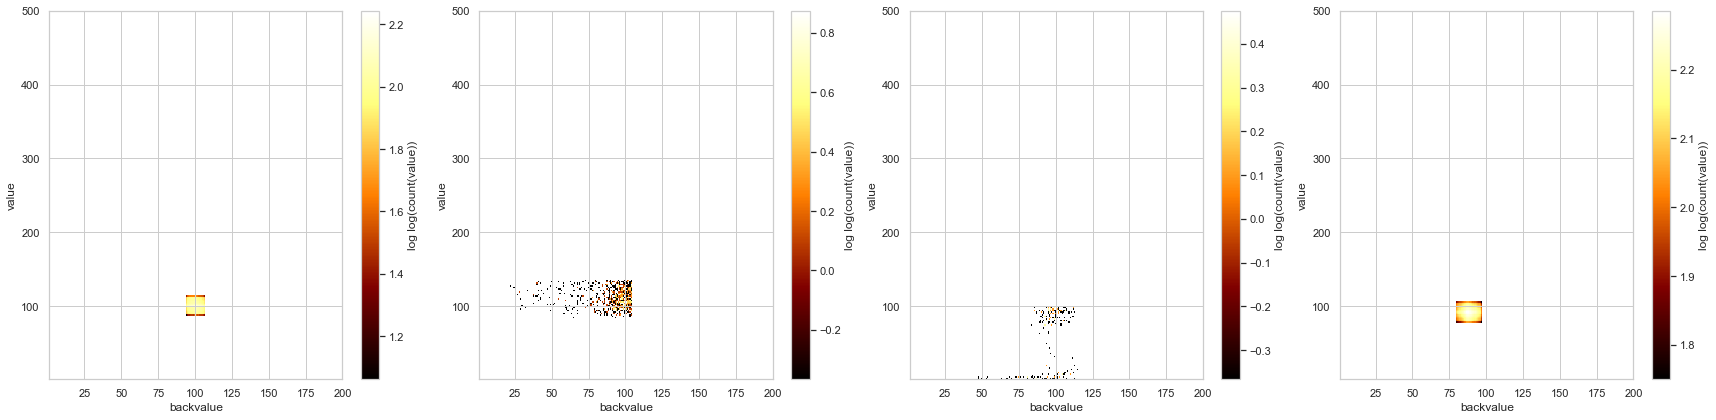

In [61]:
sns.set_theme(style="whitegrid")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))
plt.sca(ax1)
# code für 1te heatmap
n_cleaned_scaled.plot(n_cleaned_scaled.backvalue,
                      n_cleaned_scaled.value,
                      what=np.log(vaex.stat.count(n_cleaned_scaled.value)),
                      limits=[[1, 200],
                              [1, 500]],
                      f='log',
                      #title='n'
                     )

plt.sca(ax2)
# code für 2te heatmap
p_cleaned_scaled.plot(p_cleaned_scaled.backvalue,
                      p_cleaned_scaled.value,
                      what=np.log(vaex.stat.count(p_cleaned_scaled.value)),
                      limits=[[1, 200],
                              [1, 500]],
                      f='log',
                      #title='p'
                     )

plt.sca(ax3)
# code für 3te heatmap
z_cleaned_scaled.plot(z_cleaned_scaled.backvalue,
                      z_cleaned_scaled.value,
                      what=np.log(vaex.stat.count(z_cleaned_scaled.value)),
                      limits=[[1, 200],
                              [1, 500]], 
                      f='log',
                      #title='z'
                     )

plt.sca(ax4)
# code für 4te heatmap
s_cleaned_scaled.plot(s_cleaned_scaled.backvalue,
                      s_cleaned_scaled.value,
                      what=np.log(vaex.stat.count(s_cleaned_scaled.value)),
                      limits=[[1, 200],
                              [1, 500]],
                      f='log',
                      #title='s'
                     )

plt.show()

+-std

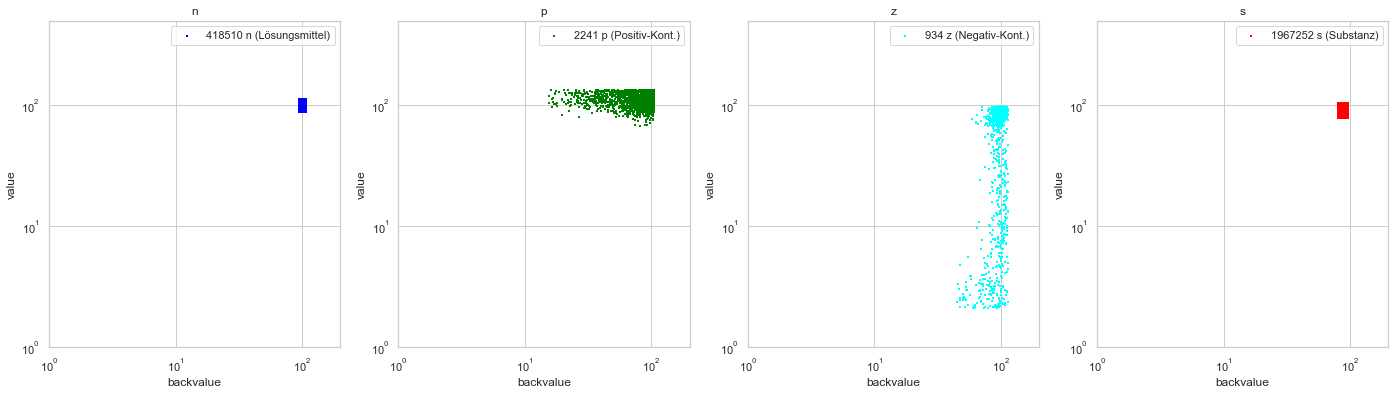

Benötigte Systemzeit: 13.961s


In [60]:
start_proc = time.process_time()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))
plt.sca(ax1)
# code für 1te heatmap
plt.scatter(n_cleaned_scaled.backvalue.values,
            n_cleaned_scaled.value.values,
            8,
            marker='+',
            color='blue',
            label=str(len(n_cleaned_scaled))+' n (Lösungsmittel)',
            alpha=1
           )
plt.xlim(1, 200)
plt.ylim(1, 500)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('n')


plt.sca(ax2)
# code für 2te heatmap
plt.scatter(p_cleaned_scaled.backvalue.values,
            p_cleaned_scaled.value.values,
            8,
            marker='+',
            color='green',
            label=str(len(p_cleaned_scaled))+' p (Positiv-Kont.)',
            alpha=1
           )
plt.xlim(1, 200)
plt.ylim(1, 500)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('p')


plt.sca(ax3)
# code für 3te heatmap
plt.scatter(z_cleaned_scaled.backvalue.values,
            z_cleaned_scaled.value.values,
            8,
            marker='+',
            color='cyan',
            label=str(len(z_cleaned_scaled))+' z (Negativ-Kont.)',
            alpha=1
           )
plt.xlim(1, 200)
plt.ylim(1, 500)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('z')


plt.sca(ax4)
# code für 4te heatmap
plt.scatter(s_cleaned_scaled.backvalue.values,
            s_cleaned_scaled.value.values,
            8,
            marker='+',
            color='red',
            label=str(len(s_cleaned_scaled))+' s (Substanz)',
            alpha=1
           )
plt.xlim(1, 200)
plt.ylim(1, 500)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('s')

plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))


+-3std

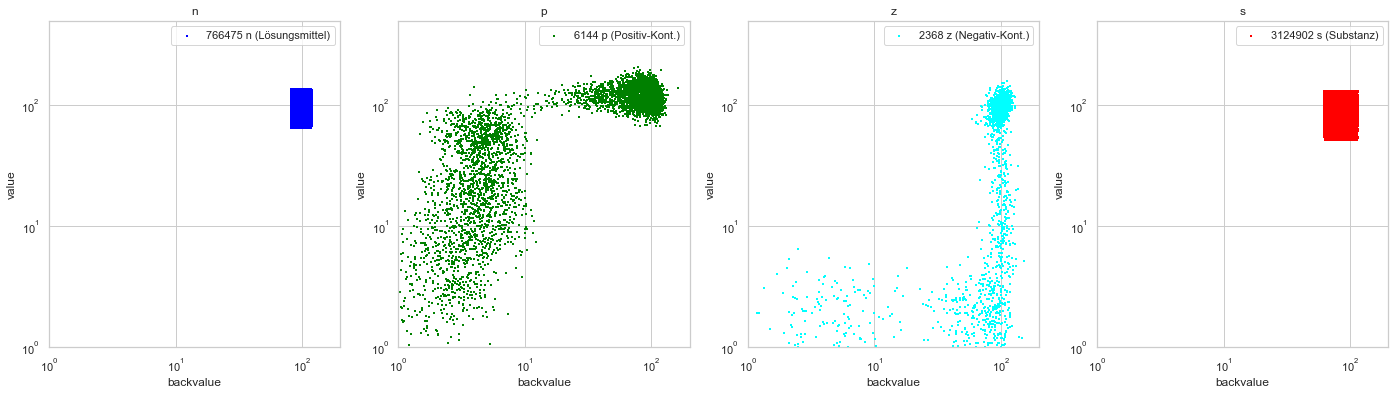

Benötigte Systemzeit: 20.393s


In [63]:
start_proc = time.process_time()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))
plt.sca(ax1)
# code für 1te heatmap
plt.scatter(n_3_cleaned_scaled.backvalue.values,
            n_3_cleaned_scaled.value.values,
            8,
            marker='+',
            color='blue',
            label=str(len(n_3_cleaned_scaled))+' n (Lösungsmittel)',
            alpha=1
           )
plt.xlim(1, 200)
plt.ylim(1, 500)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('n')


plt.sca(ax2)
# code für 2te heatmap
plt.scatter(p_3_cleaned_scaled.backvalue.values,
            p_3_cleaned_scaled.value.values,
            8,
            marker='+',
            color='green',
            label=str(len(p_3_cleaned_scaled))+' p (Positiv-Kont.)',
            alpha=1
           )
plt.xlim(1, 200)
plt.ylim(1, 500)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('p')


plt.sca(ax3)
# code für 3te heatmap
plt.scatter(z_3_cleaned_scaled.backvalue.values,
            z_3_cleaned_scaled.value.values,
            8,
            marker='+',
            color='cyan',
            label=str(len(z_3_cleaned_scaled))+' z (Negativ-Kont.)',
            alpha=1
           )
plt.xlim(1, 200)
plt.ylim(1, 500)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('z')


plt.sca(ax4)
# code für 4te heatmap
plt.scatter(s_3_cleaned_scaled.backvalue.values,
            s_3_cleaned_scaled.value.values,
            8,
            marker='+',
            color='red',
            label=str(len(s_3_cleaned_scaled))+' s (Substanz)',
            alpha=1
           )
plt.xlim(1, 200)
plt.ylim(1, 500)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('s')

plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))


+-5std

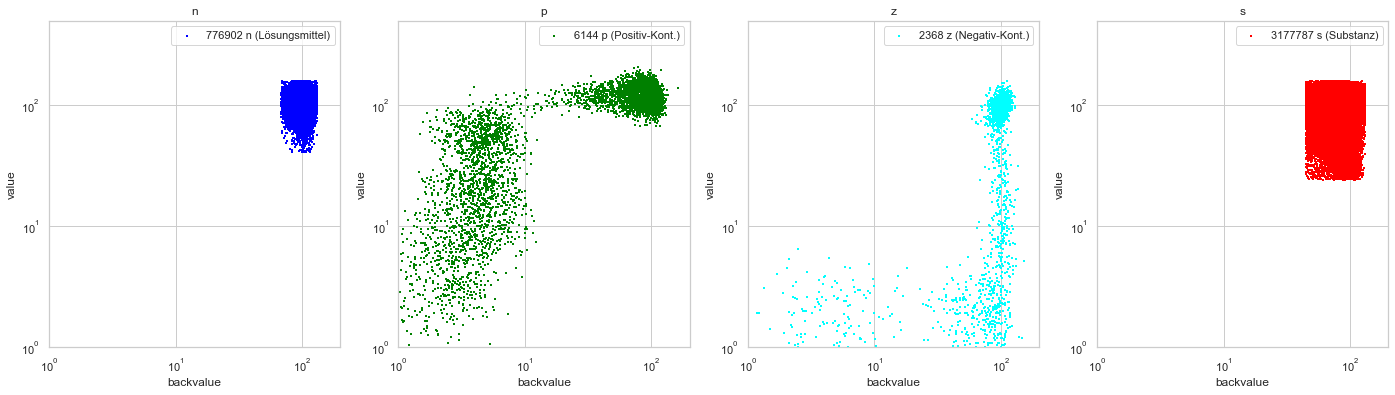

Benötigte Systemzeit: 21.462s


In [62]:
start_proc = time.process_time()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))
plt.sca(ax1)
# code für 1te heatmap
plt.scatter(n_5_cleaned_scaled.backvalue.values,
            n_5_cleaned_scaled.value.values,
            8,
            marker='+',
            color='blue',
            label=str(len(n_5_cleaned_scaled))+' n (Lösungsmittel)',
            alpha=1
           )
plt.xlim(1, 200)
plt.ylim(1, 500)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('n')


plt.sca(ax2)
# code für 2te heatmap
plt.scatter(p_5_cleaned_scaled.backvalue.values,
            p_5_cleaned_scaled.value.values,
            8,
            marker='+',
            color='green',
            label=str(len(p_5_cleaned_scaled))+' p (Positiv-Kont.)',
            alpha=1
           )
plt.xlim(1, 200)
plt.ylim(1, 500)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('p')


plt.sca(ax3)
# code für 3te heatmap
plt.scatter(z_5_cleaned_scaled.backvalue.values,
            z_5_cleaned_scaled.value.values,
            8,
            marker='+',
            color='cyan',
            label=str(len(z_3_cleaned_scaled))+' z (Negativ-Kont.)',
            alpha=1
           )
plt.xlim(1, 200)
plt.ylim(1, 500)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('z')


plt.sca(ax4)
# code für 4te heatmap
plt.scatter(s_5_cleaned_scaled.backvalue.values,
            s_5_cleaned_scaled.value.values,
            8,
            marker='+',
            color='red',
            label=str(len(s_5_cleaned_scaled))+' s (Substanz)',
            alpha=1
           )
plt.xlim(1, 200)
plt.ylim(1, 500)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('backvalue')
plt.ylabel('value')
plt.legend()
plt.title('s')

plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))



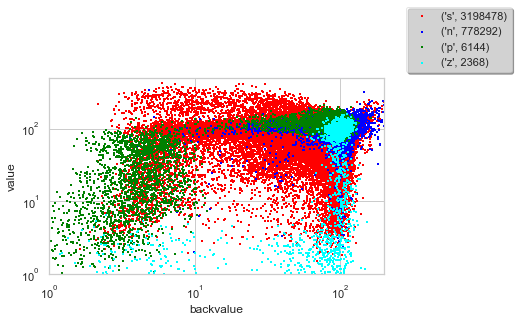

Benötigte Systemzeit: 38.749s


In [40]:
start_proc = time.process_time()
fig = plt.figure()

ax1 = plt.gca()
ax1.scatter(s.backvalue.values,
            s.value.values,
            4,
            marker="+",
            color='red',
            label=('s', len(s)),
            alpha=1
           )
ax1.set_xlim(1, 200)
ax1.set_ylim(1, 500)

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.set_xlabel('backvalue')
ax1.set_ylabel('value')

ax1.set_aspect(0.5)



ax2 = plt.gca()
ax2.scatter(n.backvalue.values,
            n.value.values,
            4,
            marker="+",
            color='blue',
            label=('n', len(n)),
            alpha=1
           )
ax2.set_xlim(1, 200)
ax2.set_ylim(1, 500)

ax2.set_yscale('log')
ax2.set_xscale('log')

ax2.set_xlabel('backvalue')
ax2.set_ylabel('value')

ax2.set_aspect(0.5)



ax3 = plt.gca()
ax3.scatter(p.backvalue.values,
            p.value.values,
            4,
            marker="+",
            color='green',
            label=('p', len(p)),
            alpha=1
           )
ax3.set_xlim(1, 200)
ax3.set_ylim(1, 500)

ax3.set_yscale('log')
ax3.set_xscale('log')

ax3.set_xlabel('backvalue')
ax3.set_ylabel('value')

ax3.set_aspect(0.5)



ax4 = plt.gca()
ax4.scatter(z.backvalue.values,
            z.value.values,
            4,
            marker="+",
            color='cyan',
            label=('z', len(z)),
            alpha=1
           )
ax4.set_xlim(1, 200)
ax4.set_ylim(1, 500)

ax4.set_yscale('log')
ax4.set_xscale('log')

ax4.set_xlabel('backvalue')
ax4.set_ylabel('value')

ax4.set_aspect(0.5)

leg = plt.legend(loc='best', bbox_to_anchor=(1.05, 1), shadow=True)
leg.get_frame().set_alpha(0.5)

plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))


In [19]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [17]:
df_copy = df_cleaned_scaled.to_copy(column_names=('value', 'backvalue'))
df_numpy = df_copy.values


In [ ]:
start_proc = time.process_time()

fcm = FCM(n_clusters=4)
fcm.fit(df_numpy)

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))


In [ ]:
start_proc = time.process_time()

# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(df_numpy)

# plot result
#f, axes = plt.subplots(1, 2, figsize=(11,5))
#axes[0].scatter(X[:,0], X[:,1], alpha=.1)
plt.scatter(df_numpy[:,0], df_numpy[:,1], c=fcm_labels, alpha=.1)
plt.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
#plt.savefig('images/basic-clustering-output.jpg')
plt.show()

ende_proc = time.process_time()
print('Benötigte Systemzeit: {:5.3f}s'.format(ende_proc-start_proc))